In [1]:
# DL assignment 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.utils import resample

In [3]:
dataset = pd.read_csv('Surgical-deepnet.csv')

In [4]:
dataset

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [5]:
def sigmoid(x):
   return 1/(1 + np.exp(-x))

In [22]:
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

In [23]:
print(x)

[-10.          -9.31034483  -8.62068966  -7.93103448  -7.24137931
  -6.55172414  -5.86206897  -5.17241379  -4.48275862  -3.79310345
  -3.10344828  -2.4137931   -1.72413793  -1.03448276  -0.34482759
   0.34482759   1.03448276   1.72413793   2.4137931    3.10344828
   3.79310345   4.48275862   5.17241379   5.86206897   6.55172414
   7.24137931   7.93103448   8.62068966   9.31034483  10.        ]


In [24]:
X, Y = np.meshgrid(x, y)

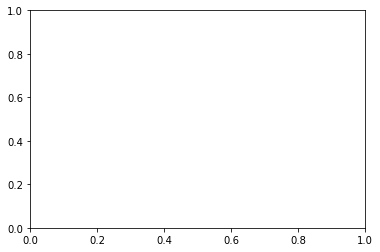

In [25]:
a,b = plt.subplots(1,1)

In [26]:
def f(x, y):
       return x**2 + y **2

In [27]:
Z = f(X, Y)

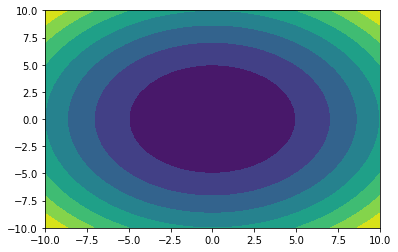

In [28]:
plt.contourf(X, Y, Z)

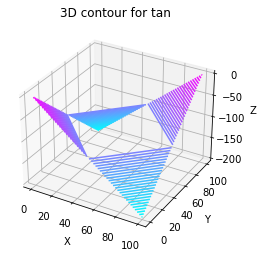

In [30]:
from mpl_toolkits import mplot3d
from matplotlib import cm
import math

x = [i for i in range(0, 200, 100)]
y = [i for i in range(0, 200, 100)]

X, Y = np.meshgrid(x, y)
Z = []
for i in x:
    t = []
    for j in y:
        t.append(math.tan(math.sqrt(i*2+j*2)))
    Z.append(t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap=cm.cool)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D contour for tan')
plt.show()

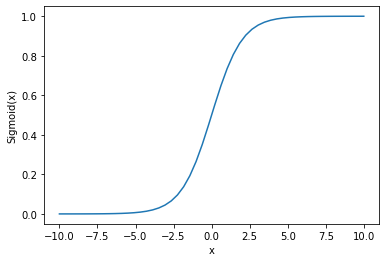

In [23]:
x = np.linspace(-10, 10, 50)   
p = sigmoid(x)
plt.xlabel("x") 
plt.ylabel("Sigmoid(x)")  
plt.plot(x, p) 
plt.show()

# Toy dataset

In [24]:
dataset = pd.read_csv('toy_dataset.csv')

In [25]:
dataset

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [26]:
class Sigmoid_Neuron:
    def __init__(self, learning_rate=0.01, iterations = 1000):
        self.learning_rate = learning_rate
        self.iters = iterations
        self.bias = None  
        self.errorPerItr = None
        self.weight = None
        
    def predict_values(self, valuea):
        y_pred = []
        for i in range(len(valuea)):
            x=valuea.iloc[i]
            weighted_input = np.dot(x, self.weight) + self.bias  # weighted input + bias
            y_predicted = self.sigmoid_function(weighted_input)  # applying sigmoid function to weighted input
            y_pred.append(y_predicted)
        return y_pred
    
    def sigmoid_function(self,t):
        return 1.0/(1.0 + np.exp(-t))
    
    def GD_algorithm(self, valuea, valueb):
        self.bias = 0
        n_features = valuea.shape[1]
        self.weight = np.zeros(n_features)
        
        #ensure that y is 0 or 1
        y = np.array([1 if i>0 else 0 for i in valueb])
        
        self.errorPerItr = []        
        #we assume that sigmoid model will converge in finite iterations
        for itr in range(self.iters):
            grad_weight = 0
            grad_bias = 0
            loss = 0
            for i in range(len(valuea)):
                x=valuea.iloc[i]
                linear_output = np.dot(x, self.weight) + self.bias 
                y_predicted = self.sigmoid_function(linear_output)
                fx = y_predicted
                
                y= valueb.iloc[i]
                grad_weight += (fx - y)*fx*(1-fx)*np.dot(np.ones(n_features), x)
                grad_bias += (fx - y)*fx*(1-fx)
                
                #for each epoch we will calculate the loss
                loss += (fx - y)**2
            self.errorPerItr.append(0.5 * loss) #0.5 is justfor convenience
            print("Loss: ", 0.5 * loss)
            
            #calculate new W and b
            for i in range(n_features): # since W is a vector
                self.weight[i] -= self.learning_rate*grad_weight
            self.bias -= self.learning_rate*grad_bias    # b is a scalar
            print("weights: ", self.weight)
            print("Bias: ", self.bias)

In [27]:
dataset = dataset.dropna()

In [28]:
dataset

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [29]:
columns = ["Number", "Age", "Illness"]
dataset = dataset[columns]
dataset

,Number,Age,Illness
0,1,41,No
1,2,54,No
2,3,42,No
3,4,40,No
4,5,46,No
...,...,...,...
149995,149996,48,No
149996,149997,25,No
149997,149998,26,No
149998,149999,25,No


In [30]:
# Replace illness dataframe by 1 if it is yes otherwise 0
dataset['Illness'] = dataset['Illness'].replace(to_replace='No', value=0)
dataset['Illness'] = dataset['Illness'].replace(to_replace='Yes', value=1)

C:\Users\admin\AppData\Local\Temp/ipykernel_12572/3771726695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Illness'] = dataset['Illness'].replace(to_replace='No', value=0)
C:\Users\admin\AppData\Local\Temp/ipykernel_12572/3771726695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Illness'] = dataset['Illness'].replace(to_replace='Yes', value=1)


In [31]:
dataset['Illness'].value_counts()

0    137861
1     12139
Name: Illness, dtype: int64

In [32]:
# balancing the dataset by reducing records of class 0
class_0 = dataset[dataset.Illness!=1]
class_0

,Number,Age,Illness
0,1,41,0
1,2,54,0
2,3,42,0
3,4,40,0
4,5,46,0
...,...,...,...
149995,149996,48,0
149996,149997,25,0
149997,149998,26,0
149998,149999,25,0


In [33]:
class_0 = class_0.loc[0:12139]
class_0["Illness"].value_counts()

0    11170
Name: Illness, dtype: int64

In [34]:
class_1 = dataset[dataset.Illness!=0]
class_1["Illness"].value_counts()

1    12139
Name: Illness, dtype: int64

In [35]:
frames = [class_0, class_1]
  
balanced_data = pd.concat(frames)
display(balanced_data["Illness"].value_counts())
display(balanced_data.shape)

1    12139
0    11170
Name: Illness, dtype: int64

(23309, 3)

In [36]:
# split training and test data
from sklearn.model_selection import train_test_split
x = balanced_data.drop("Illness", axis = 1)
y = balanced_data["Illness"]
display(x)
display(y)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,test_size = 0.1, stratify = y)
print("X ",x.shape,x_train.shape, x_test.shape)
print("Y means: ",y.mean(),y_train.mean(), y_test.mean())

,Number,Age
0,1,41
1,2,54
2,3,42
3,4,40
4,5,46
...,...,...
149847,149848,52
149886,149887,64
149936,149937,35
149949,149950,28


0         0
1         0
2         0
3         0
4         0
         ..
149847    1
149886    1
149936    1
149949    1
149980    1
Name: Illness, Length: 23309, dtype: int64

X  (23309, 2) (20978, 2) (2331, 2)
Y means:  0.5207859625037539 0.5207836781390027 0.5208065208065208


In [37]:
sigModel = Sigmoid_Neuron(learning_rate = 0.01, iterations=5)

In [38]:
# Calling GD function
sigModel.GD_algorithm(x_train,y_train)

Loss:  2622.25
weights:  [954844.44875 954844.44875]
Bias:  1.09
Loss:  5026.5
weights:  [954844.44875 954844.44875]
Bias:  1.09
Loss:  5026.5
weights:  [954844.44875 954844.44875]
Bias:  1.09
Loss:  5026.5
weights:  [954844.44875 954844.44875]
Bias:  1.09
Loss:  5026.5
weights:  [954844.44875 954844.44875]
Bias:  1.09


In [39]:
def accuracy(y_testing, y_pred):
    accuracy = np.sum(y_testing == y_pred) / len(y_testing)
    return accuracy

In [40]:
prediction = sigModel.predict_values(x_test)
print("Sigmoid Classification accuracy is: ",accuracy(y_test, prediction))

Sigmoid Classification accuracy is:  0.5208065208065208
